In [1]:
import numpy as np
import matplotlib.pyplot as plt
import slugger as slug
import pandas as pd
import matplotlib.ticker as ticker


params = {'text.usetex': False, 'mathtext.fontset': 'stix'}
plt.rcParams.update(params)
%matplotlib inline

In [2]:
weno5_rk3 = pd.read_csv('./pub_weno5_rk3.csv', index_col=0)
weno5_rk4 = pd.read_csv('./pub_weno5_rk4.csv', index_col=0)

weno5_sf3 = pd.read_csv('./pub_weno5_sf3.csv', index_col=0)
weno5_sf4 = pd.read_csv('./pub_weno5_sf4.csv', index_col=0)

NN = np.array(weno5_rk3.index)

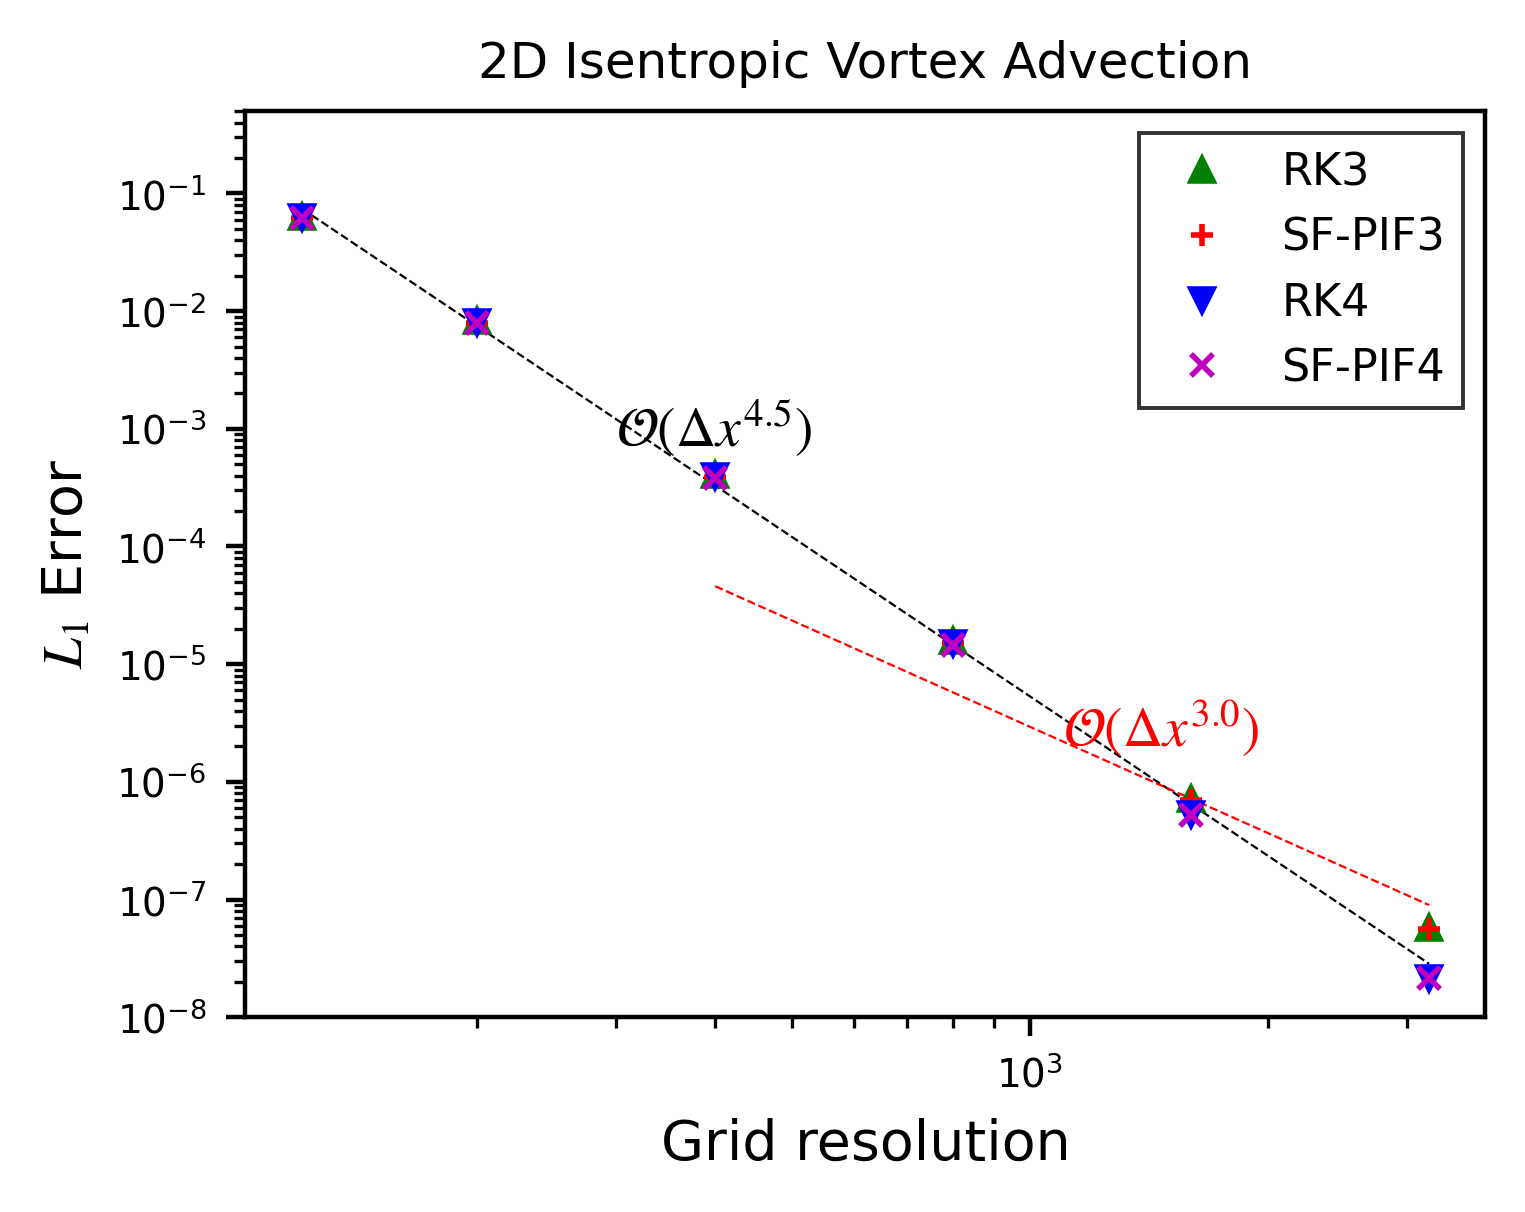

In [11]:
fig = plt.figure(figsize=(4,3), dpi=400)
ax = fig.add_subplot(1,1,1)

a = np.float64(weno5_sf4.index[3])
b = weno5_sf4["dens"][a]

a2 = np.float64(weno5_rk3.index[4])
b2 = weno5_rk3["dens"][a2]

# 4.6 order
line_order = 4.5
ax.plot(NN, (b*a**line_order)*(NN)**(-line_order), 'k--', linewidth=0.4)
ax.annotate(r'$\mathcal{{O}} (\Delta x^{{{}}})$'.format(line_order), xy=(3.E2,7.E-4))

# 3 order
line_order2 = 3.0
ax.plot(NN[2:], (b2*a2**line_order2)*(NN[2:])**(-line_order2), 'r--', linewidth=0.4)
ax.annotate(r'$\mathcal{{O}} (\Delta x^{{{}}})$'.format(line_order2), xy=(1.1E3,2.E-6), color='r')

ax.plot(weno5_rk3['dens'], 'g^', markersize=4, linewidth=0.5, label='RK3')
ax.plot(weno5_sf3['dens'], 'r+', markersize=4, linewidth=0.5, label='SF-PIF3')

ax.plot(weno5_rk4['dens'], 'bv', markersize=4, linewidth=0.5, label='RK4')
ax.plot(weno5_sf4['dens'], 'mx', markersize=4, linewidth=0.5, label='SF-PIF4')




ax.loglog()

# ax.set_xlim(1.E1, 1.5E3)
# ax.set_ylim(1.E-8, 1.E-1)
ax.set_ylim(1.E-8, 0.5)


legend = ax.legend(fontsize=8, numpoints=1, fancybox=False, edgecolor='k')
legend.get_frame().set_linewidth(.7)

ax.tick_params(axis='both', which='both', labelsize=7)
ax.set_title('2D Isentropic Vortex Advection', fontsize=9)

ax.set_xlabel('Grid resolution')
ax.set_ylabel(r'$L_1$' + ' Error')



fig.savefig('./weno5_vortex_error_fourth.pdf', bbox_inches='tight', pad_inches=0.05)

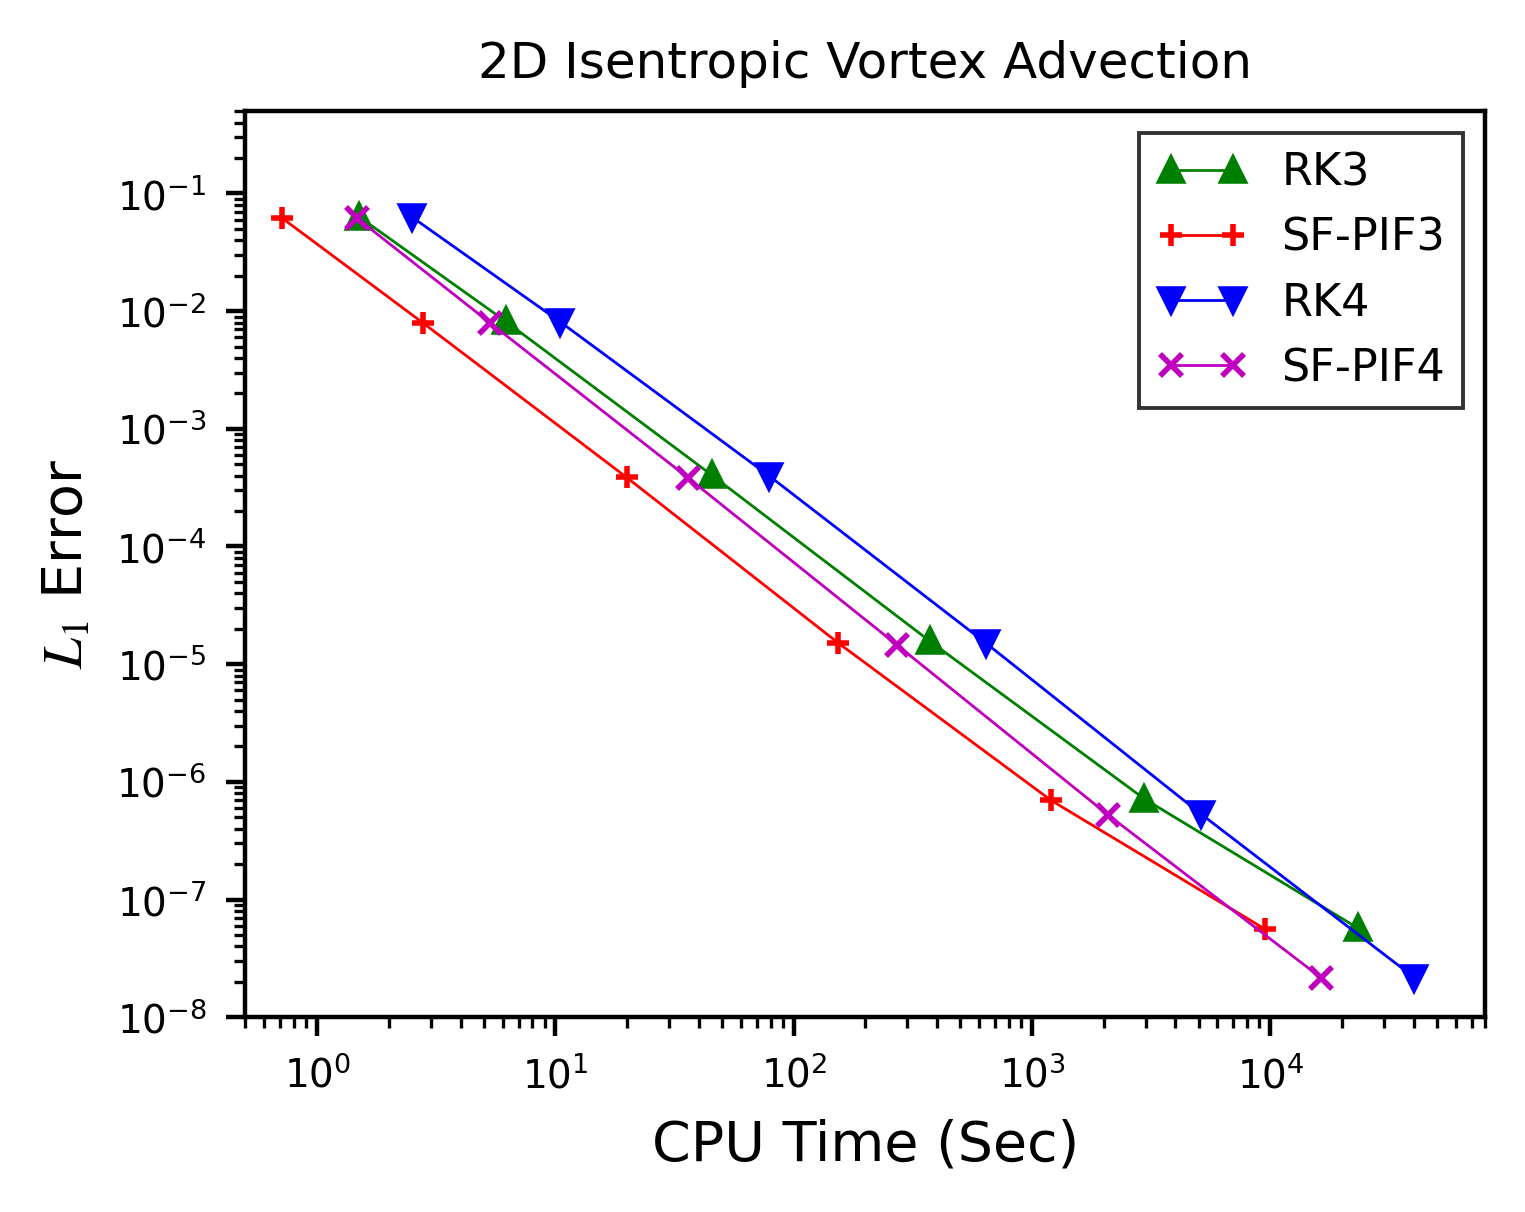

In [9]:
fig = plt.figure(figsize=(4,3), dpi=400)
ax = fig.add_subplot(1,1,1)

ax.plot(weno5_rk3['eTime'], weno5_rk3['dens'], 'g^-', markersize=4, linewidth=0.5, label='RK3')
ax.plot(weno5_sf3['eTime'], weno5_sf3['dens'], 'r+-', markersize=4, linewidth=0.5, label='SF-PIF3')

ax.plot(weno5_rk4['eTime'], weno5_rk4['dens'], 'bv-', markersize=4, linewidth=0.5, label='RK4')
ax.plot(weno5_sf4['eTime'], weno5_sf4['dens'], 'mx-', markersize=4, linewidth=0.5, label='SF-PIF4')




# ## draw lines
# # horizontal
# target_error = 1.E-6
# ax.plot([0, 3.3E3], [target_error, target_error], 'k--', linewidth=0.5)
# ax.annotate('Target Error, ' + r'$10^{-6}$', xy=(1.2,1.2E-6), fontsize=7)

# vertical
sf3_tTime = 1.2E2
rk3_tTime = 2.3E2
# ax.plot([sf3_tTime, sf3_tTime], [1.2E-5, target_error], 'k--', linewidth=0.5)
# ax.plot([rk3_tTime, rk3_tTime], [1.2E-5, target_error], 'k--', linewidth=0.5)



ax.loglog()

ax.set_xlim(0.5, 8.E4)
ax.set_ylim(1.E-8, 0.5)

legend = ax.legend(fontsize=8, numpoints=2, fancybox=False, edgecolor='k')
legend.get_frame().set_linewidth(.7)

ax.tick_params(axis='both', which='both', labelsize=7)
ax.set_title('2D Isentropic Vortex Advection', fontsize=9)

# # modify xticks
# ax.set_xticks([1., 10., sf3_tTime, rk3_tTime, 1000.])
# ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))


ax.set_xlabel('CPU Time (Sec)')
ax.set_ylabel(r'$L_1$' + ' Error')


fig.savefig('./weno5_vortex_time_fourth.pdf', bbox_inches='tight', pad_inches=0.05)

In [5]:
weno5_rk3

,dens,velx,vely,pres,eTime,order
120,6.313075e-02,1.377232e-01,1.375779e-01,7.586563e-02,1.501662,NaN
200,8.197625e-03,1.828254e-02,1.820612e-02,8.773208e-03,6.174227,3.996204
400,4.020091e-04,7.816025e-04,7.756815e-04,3.383723e-04,45.435161,4.349906
800,1.568761e-05,3.055698e-05,2.994021e-05,1.331855e-05,372.473924,4.679531
1600,7.176388e-07,1.504683e-06,1.446785e-06,7.595071e-07,2957.255538,4.450224
3200,5.723825e-08,1.158715e-07,1.087782e-07,6.834328e-08,23274.374673,3.648206


In [6]:
weno5_sf3.eTime/weno5_rk3.eTime

120     0.475212
200     0.449362
400     0.437790
800     0.413225
1600    0.406831
3200    0.407944
Name: eTime, dtype: float64

In [7]:
weno5_rk4

,dens,velx,vely,pres,eTime,order
120,6.297589e-02,1.370056e-01,1.370368e-01,7.541556e-02,2.498723,NaN
200,8.153108e-03,1.806430e-02,1.803584e-02,8.650861e-03,10.424590,4.002056
400,4.006776e-04,7.511766e-04,7.505775e-04,3.218372e-04,78.472794,4.346836
800,1.505634e-05,2.623869e-05,2.623703e-05,1.081602e-05,641.503017,4.733999
1600,5.334324e-07,8.916892e-07,8.908450e-07,3.689106e-07,5115.465071,4.818922
3200,2.172564e-08,3.032189e-08,3.031309e-08,1.254618e-08,40195.034356,4.617835


In [8]:
weno5_sf4

,dens,velx,vely,pres,eTime,order
120,6.138543e-02,1.349552e-01,1.350483e-01,7.452793e-02,1.472449,NaN
200,7.914427e-03,1.776446e-02,1.778019e-02,8.525499e-03,5.325843,4.010146
400,3.848195e-04,7.388978e-04,7.402055e-04,3.174583e-04,35.887585,4.362231
800,1.456507e-05,2.599562e-05,2.584009e-05,1.073006e-05,270.938838,4.723598
1600,5.208845e-07,8.867149e-07,8.822839e-07,3.668026e-07,2091.202827,4.805405
3200,2.153202e-08,3.032773e-08,3.024759e-08,1.281319e-08,16377.731573,4.596408
